# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from numpy.random import seed
import seaborn as sns

data_path = '/Users/marciobernardo/Springboard/Python/Projects/Frequentist Case Study/insurance2.csv'
medical = pd.read_csv(data_path)

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The distribution of the data is assimetric; therefore, mean is not a good measure of central tendency. Since the distribution is skewed the standard deviation is large.

In [5]:
mean_charge = np.mean(medical.charges)
std_charge = np.std(medical.charges)
print('Average charge is: ', mean_charge, '\nStandard deviation of charges is: ', std_charge)

Average charge is:  13270.422265141257 
Standard deviation of charges is:  12105.484975561605


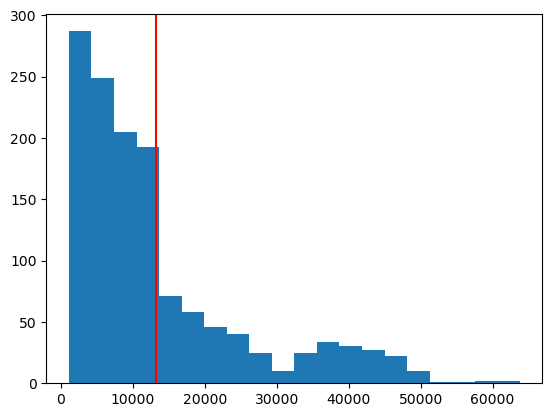

In [140]:
_ = plt.hist(medical.charges, bins =20)
_ = plt.axvline(mean_charge, color='r');

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ A confidence interval with 95% confidence shows that the concern is misplaced. While the data is assymetric and skewed, I used a bootstrap method to calculate the confidence interval.

In [185]:
data = medical.charges
ae, loce, scalee = scipy.stats.skewnorm.fit(data)
print(ae, loce, scalee)

loc_norm, scale_norm = scipy.stats.norm.fit(data)
print(loc_norm, scale_norm)

392556068.52469647 1121.8736691143004 17150.50542749687
13270.422265141257 12105.484975561612


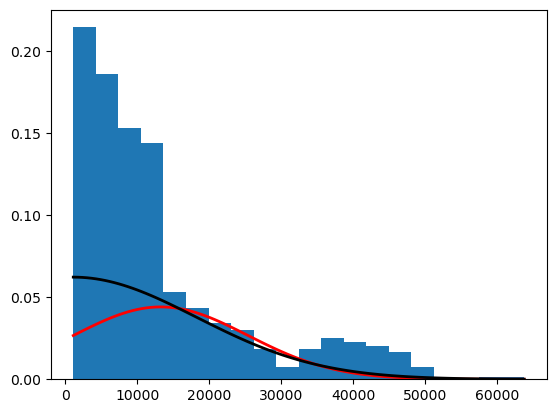

In [187]:
size = len(data)
x = np.linspace(np.min(data), np.max(data), 100)
pdf_skewnorm = scipy.stats.skewnorm.pdf(x,ae,loc=loce,scale=scalee) * size
pdf_norm = scipy.stats.norm.pdf(x, loc=loc_norm,scale=scale_norm) * size

_ = plt.plot(x, pdf_norm, 'r', linewidth=2)
_ = plt.plot(x, pdf_skewnorm, 'k', linewidth=2)
_ = plt.hist(data, bins =20, weights=np.ones_like(data)/ size)

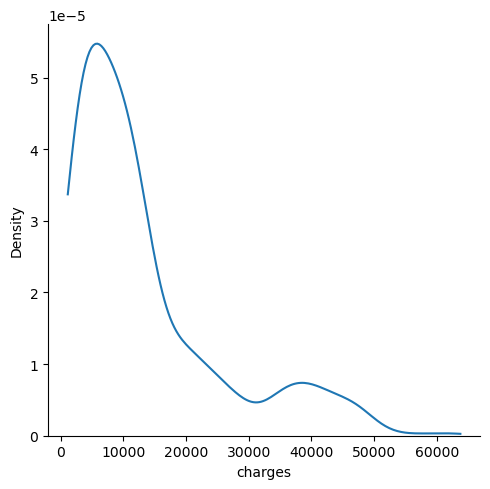

In [178]:
sns.displot(data, kind = 'kde', cut=0);

Neither the normal not the skewed-normal distribution are a good fit for the data, Since we do not know the actual distribution of the data we can use bootstrap to calculate a confidence interval with 95% confidence.

In [182]:
#Boostrap method
N = 10000
mean_estimates = []
for _ in range(N):
    re_sample_idx = np.random.randint(0, len(data), data.shape)
    mean_estimates.append(np.mean(data[re_sample_idx]))


In [183]:
sorted_estimates = np.sort(np.array(mean_estimates))
conf_interval = [sorted_estimates[int(0.025 * N)], sorted_estimates[int(0.975 * N)]]
print(conf_interval)

[12636.220947121828, 13921.65909667415]


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__  The left side (lower charge) using the normal distribution is 13,814. Which suggest that the is no reason for the administrator concern. However, using the median instead of the mean to calculate the lower charge; returns a charge of 9,926, which is lower than the threshold of 12,000. The usage of median as the central tendency for this data is justified due to the assimetry in the data. Nevertheless, the bootstrap method returns Confidence Interval above the 12.000 threshold. Since we do not know the data distribution this method should be the most reliable. Therefore, we conclude that the hospital charge isn't likely to be lower than 12,000.

In [193]:
# one sided confidence interval using the normal distribution.
z_critical = scipy.stats.norm.ppf(0.05)
print('z_critical: ', z_critical)
margin_of_error = z_critical * (std_charge/np.sqrt(len(data)))
print('margin_of_error: ', margin_of_error)

z_critical:  -1.6448536269514729
margin_of_error:  -544.3539681352129


In [190]:
conf_interval = [mean_charge - margin_of_error]
print(conf_interval)

[13814.776233276469]


In [194]:
# A alternative measurement would be to use the median to calculate the confidence interval, since the data is assymetric.
alt_conf_interval = [np.median(data) - margin_of_error]
print('alternative conf_interval: ', alt_conf_interval)


alternative conf_interval:  [9926.386968135212]


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ $H_{0}$ : $\bar{x_{0}} - \bar{x_{1}} = 0$ (Both groups are charged the same)  

$H_{a}$ : $\bar{x_{0}} - \bar{x_{1}} \not= 0$ (Groups are not charged the same)

In [201]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [211]:
grouped_mean = medical[['charges','insuranceclaim']].groupby('insuranceclaim').charges.mean()
grouped_std = medical[['charges','insuranceclaim']].groupby('insuranceclaim').charges.std()
grouped_stats= pd.DataFrame({'mean':grouped_mean,'std': grouped_std})
print(grouped_stats)

                        mean           std
insuranceclaim                            
0                8821.421892   6446.510127
1               16423.928277  14045.928419


In [216]:
n = medical[['charges','insuranceclaim']].groupby('insuranceclaim').count()
print(n)

np.sum(n) == len(data)

                charges
insuranceclaim         
0                   555
1                   783


charges    True
dtype: bool

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [237]:
# manual test
std_pooled = np.sqrt(np.divide((n.charges[0]-1)*grouped_std[0]**2 + (n.charges[1]-1)*grouped_std[1]**2, np.sum(n) - 2))
print(std_pooled)

charges    11520.034269
dtype: float64


In [252]:
t_statistic = np.divide(grouped_mean[0]-grouped_mean[1],(std_pooled*np.sqrt(1/n.charges[0]+1/n.charges[1])))
print(np.abs(t_statistic))

charges    11.893299
dtype: float64


In [246]:
t_crit = scipy.stats.t.ppf(1-0.025, len(data)) # double sided
print(t_crit) 

1.9617385601374835


$t_{statistic} > t_{critical}$ therefore, we reject the null hypothesis

In [257]:
#p-value
p_value = (1 - scipy.stats.t.sf(t_statistic, len(data)-2)) * 2
print(p)

#t.cdf(x, df, loc=0, scale=1)

[0.]


In [251]:
# sciPy test
insured = medical.query('insuranceclaim == 1').charges
uninsured = medical.query('insuranceclaim == 0').charges
t,p = scipy.stats.ttest_ind(uninsured,insured)
print(t,p)

-11.893299030876712 4.461230231620717e-31


Highly significant p-value; the sciPy t-test rejects the null hypothesis.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ z-test are for popuations.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test